In [1]:
import os
os.chdir(r"C:\Users\james\james-jarman-portfolio")

In [2]:
import pandas as pd

fig_path = os.path.join("project-US-Candy-Distributor", "data", "processed", "candy_sales.csv")

df = pd.read_csv(fig_path)
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Country_Region,City,State_Province,Postal_Code,Division,Region,Product_ID,Product_Name,Sales,Units,Gross_Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar - Scrumdiddlyumptious,7.20,2,5.00,2.20
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


In [3]:
df_us = df[df['Country_Region'] == 'United States']

In [4]:
df_sales_states = df_us.groupby('State_Province')['Sales'].sum().reset_index()
df_sales_states.head()

,State_Province,Sales
0,Alabama,995.110003
1,Arizona,3587.550009
2,Arkansas,891.940006
3,California,27917.400103
4,Colorado,2544.910012


In [5]:
df_sales_states['Sales'] = df_sales_states['Sales'].round(2)

In [6]:
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
df_sales_states['State Code'] = df_sales_states['State_Province'].map(state_abbrev)
df_sales_states.head()

,State_Province,Sales,State Code
0,Alabama,995.11,AL
1,Arizona,3587.55,AZ
2,Arkansas,891.94,AR
3,California,27917.40,CA
4,Colorado,2544.91,CO


In [7]:
import plotly.express as px

custom_scale = ['#FFD5C2', '#A88CB4', '#4A5899']

fig = px.choropleth(
    data_frame=df_sales_states,
    locations='State Code',
    locationmode='USA-states',
    color='Sales',
    scope='usa',
    color_continuous_scale=custom_scale,
    labels={'Sales': 'Total Sales'},
    hover_name='State_Province',
    hover_data={'Sales': ':$,'}
)

fig.update_layout(
    title_text='Total Sales by US State',
    geo=dict(showlakes=True, lakecolor='#E6F4FA'),
    font=dict(color='#24264B', family='Segoe UI')
)

fig.show()

In [ ]:
fig_path = os.path.join("project-US-Candy-Distributor", "reports", "figures", "sales_by_state_map.png")
fig.write_image(fig_path)

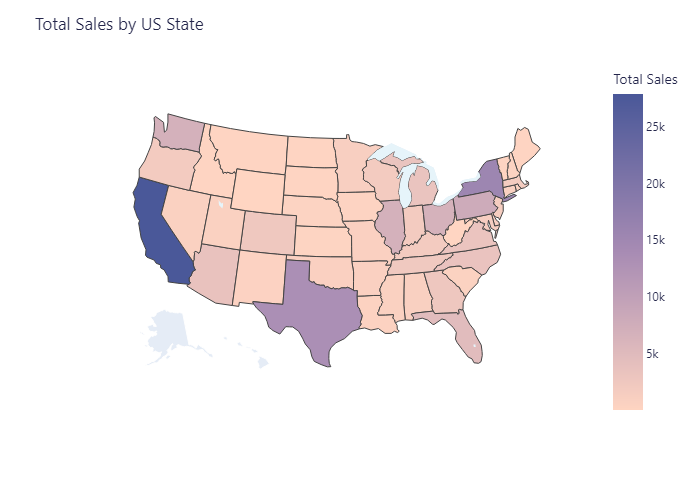

In [9]:
from IPython.display import Image

Image(filename=fig_path)